# Model Project: Ricardian Model of International Trade

General outline for us:

Ricardian Model
- assumptions ...
- definitions/ equations ...
- analytical solution: solve for relative prices; solving autarky, vs. trade price ratios
- numeric solution ...
- extension of the model: scale effects, transportation costs are probably easiest to implement

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [8]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from modelproject import RicardianModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: cannot import name 'RicardianModelClass' from 'modelproject' (c:\Users\simon\OneDrive\Dokumente\KU Master\2.Semester\Python Intro\projects-2023-mes\projects-2023-mes-19\modelproject\modelproject.py)

# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

# Ricardian Model - General Assumptions

The Ricardian Model of International Trade is a theory that explains how gains from trade develop. The basic version assumes two countries that produce two goods. Labor is the only necessary input for production. The model describes a perfect equilibrium with perfect competition on all markets. There are no transportation costs for trade between countries. The goods that countries produce are assumed to be identical for each industry. Labor is homogeneous in a given country, but labor productivity can vary between countries. Additionally, labor is assumed to be mobile across industries in a country, but not across countries. Households (that consist of workers supplying labor to the economy) maximize utility subject to a budget constraint that depends on income. 

Our setup:

Suppose there are two countries, Denmark (denoted without a *) and Germany (denoted with a *). Both countries produce two goods each, beer (y1) and pharmaceuticals (y2). Labor is the only necessary input for production. The linear production technologies are given by:

$$
y_1 = a_1 L_1;          y_2 = a_2 L_2
$$

$L_i$ denotes labor employed, $a_i$ the respective productivity in sector $i = 1,2$. The given industries use the total available labor $L$ in each country:

$$
L_1 + L_2 = L
$$

Workers are assumed to be perfectly mobile between industries, but not across countries. There are no transportation costs for trade between countries. The goods that countries produce are assumed to be identical for each industry. While labor is assumed to be homogeneous, labor productivity can vary between countries. Thus, the following inequality determines differences in productivity:

$$
\frac{a_1}{a_2} > \frac{a^*_1}{a^*_2}
$$

Each country is inhabited by a representative consumer with the following homothetic utility function:

$$
U(c_1, c_2) = \left( c_1^{\frac{\epsilon - 1}{\epsilon}} + c_2^{\frac{\epsilon - 1}{\epsilon}} \right)^{\frac{\epsilon - 1}{\epsilon}}
$$

where $c_1$ and $c_2$ denote consumption of the respective goods. Consumers financially constrained by the income $I$ they earn. This income is determined by their wage $w$ and the amount of labor they provide. The model assumes income to be fully used for the consumption of goods:

$$
I = wL = py_1 + y_2
$$

The price of $y_2$ is normalized to 1.




Graphical Analysis: PPS

In a Ricardian Model, countries differ in productivity ($a_1$ and $a_2$ in our setup) of their respective industries. This can be shown by Production Possibility Sets (PPS) that contain all possible combinations of labor endowments, that leave no labor unused. Suppose Denmark is better at producing pharmaceuticals than Germany, while Germany is better at producing beer. The individual productivites could be:

$$
a_1 = 4, a_2 = 8, a^*_1 = 10, a^*_2 = 3
$$

In [22]:
model = RicardianModelClass()

#model.ppfa()

ppf_a = model.ricardian_ppf(1)



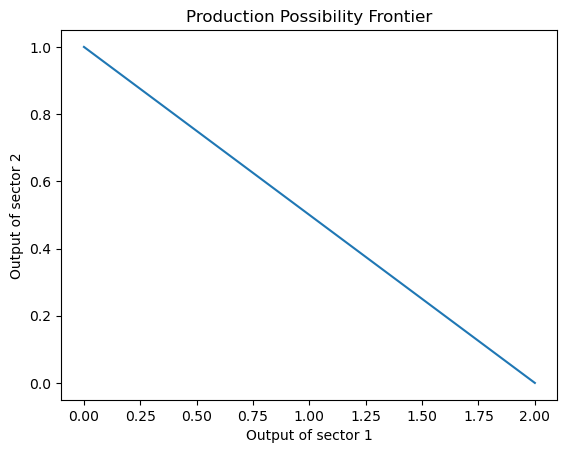

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def ricardian_ppf(a1, a2):
    """
    Returns a production possibility set (PPF) in the setting of a Ricardian model of international trade.

    Arguments:
    - a1: float, productivity of the first sector.
    - a2: float, productivity of the second sector.

    Returns:
    - ppf: function of the form y2 = a2*L - (a2/a1)*y1, where y1 and y2 are the output levels of the first and second sectors, respectively, and L is the fixed amount of labor available in the economy.
    """
    def ppf(y1):
        """
        Computes the maximum output level of the second sector (y2) given a certain output level of the first sector (y1), subject to the constraint that all available labor is used.

        Arguments:
        - y1: float, output level of the first sector.

        Returns:
        - y2: float, maximum output level of the second sector given y1.
        """
        L = 1.0  # fixed amount of labor
        y2 = a2*L - (a2/a1)*y1
        return y2 if y2 >= 0 else 0.0  # ensure non-negative output level of the second sector

    return np.vectorize(ppf)  # return a vectorized version of ppf

# Example usage:
ppf = ricardian_ppf(a1=2.0, a2=1.0)

# Plot the PPF curve
y1_values = np.linspace(0, 2, num=101)
y2_values = ppf(y1_values)
plt.plot(y1_values, y2_values)
plt.xlabel('Output of sector 1')
plt.ylabel('Output of sector 2')
plt.title('Production Possibility Frontier')
plt.show()


In [12]:
from modelproject import RicardianModelClass

model = RicardianModelClass()

ppf = model.ricardian_ppf(2)

# Compute the maximum output level of the second sector for different output levels of the first sector
y1_values = [0.0, 0.5, 1.0, 1.5, 2.0]
y2_values = [ppf(y1) for y1 in y1_values]

# Plot the PPF curve
import matplotlib.pyplot as plt
plt.plot(y1_values, y2_values)
plt.xlabel('Output of sector 1')
plt.ylabel('Output of sector 2')
plt.title('Production Possibility Frontier')
plt.show()

TypeError: ricardian_ppf() takes 2 positional arguments but 3 were given

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 